In [65]:
import numpy as np

def perceptron_learning(x, labels, w_int=np.array([1.0, 1.0, 1.0]),
                        eta=10, max_iterations=1000):
    labels = np.where(labels == 1, -1, 1)
    w = w_int.copy()
    Js = []
    error_rates = []
    w_hats = [w]
    
    ones = np.ones((len(x), 1), dtype=int)
    x = np.hstack((ones, x))
    
    for epoch in range(max_iterations):
        pred = np.sign(np.dot(x, w))
        misclassified = np.count_nonzero(pred != labels)
        error_rate = misclassified / len(labels)
        error_rates.append(error_rate)
        
        J = sum(max(0, -labels[i] * np.dot(x[i], w)) for i in range(len(x)))
        Js.append(J)
        
        if J == 0:
            print(f"Convergence reached at Epoch: {epoch + 1}")
            break

        w_new = w + eta * np.dot(x.T, labels - pred)
        w_hats.append(w_new)
        w = w_new
        
        if epoch == max_iterations - 1:
            print("Convergence failed even after 1000 epochs")
            
    return np.array(w_hats), np.array(Js), np.array(error_rates)


In [66]:
import matplotlib.pyplot as plt
def plot_linear_learning(x, labels, w_hat, Js, error_rates):
    """
    Plot training curve, and visualize the decision boundry
    Args:
        x: (N, D) data array, non-augmented format
        labels:  lengnth array with labels 1, 2
        w_hat: final learned weights.
        Js: length N_epochs of Loss values (the learning curve)
        error_rates: length N_epochs of misclassification rates as the algorithm learned
    """
    N_epochs = len(Js)
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    LIMIT = np.max(x)
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
   
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] )
                                     / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')

    ## Learning curve
    epochs = np.arange(N_epochs)
    ax[1].plot(epochs, Js, marker='o', color='green', label='J (Loss)')
    # add second y-axis for the metric of error rate: https://pythonguides.com/matplotlib-two-y-axes/
    ax2 = ax[1].twinx() 
    ax2.plot(epochs, error_rates * 100, marker='x', color='purple', label='Error Rate')
    ax[1].set_ylabel('J (Loss)', color = 'green') 
    ax[1].tick_params(axis ='y', labelcolor = 'green') 
    ax2.set_ylabel('Error rate (%)', color = 'purple') 
    ax2.tick_params(axis ='y', labelcolor = 'purple') 

    # ax[1].set_xlabel('epoch')
    # ax[1].set_ylabel('J (Loss)')
    ax2.set_ylabel('error rate (%)')
    ax[0].legend()
    ax[1].grid(':')

--------------start training----------------------
Convergence reached at Epoch: 2


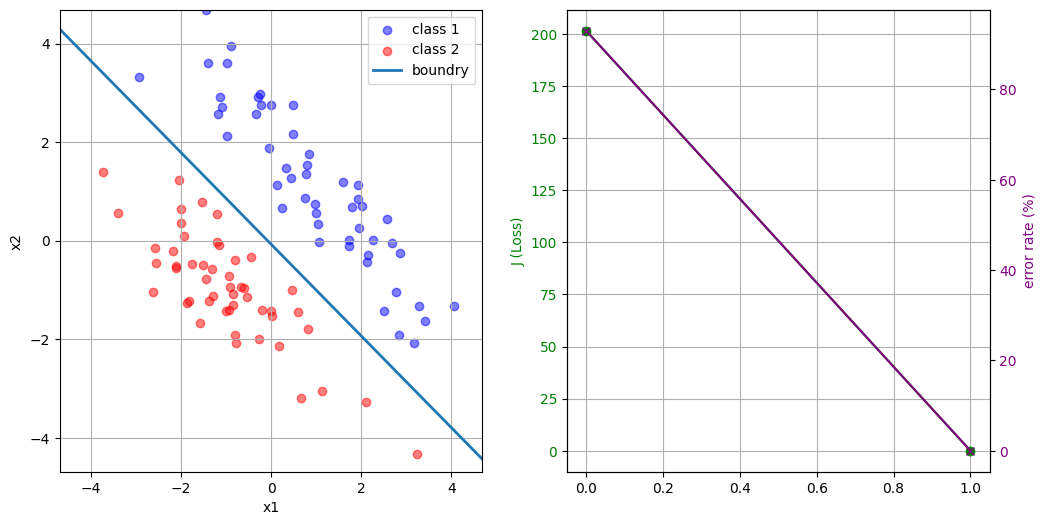

In [67]:
data = np.genfromtxt("dataset1_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

In [68]:
def perceptron_testing(x, labels, w_hat):
    '''
    Implements the perceptron testing.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_hat: final learned weights as a numpy array.
    Returns:
        error_rates: Misclassification rates.
        
    '''
    ########################
    # your code comes here
    ########################
    x = np.hstack((np.ones((len(x), 1)), x))
    labels = np.where(labels == 1, -1, 1)
    pred = np.sign(np.dot(x, w_hat))

    misclassified = np.count_nonzero(pred != labels)
    error_rate = misclassified / len(labels)
    accuracy = 1 - error_rate

    return error_rate, accuracy

In [69]:
def plot_linear_testing(x, labels, w_hat):
    """
    Visualize the decision boundary of testing sets
    Args:
    x: (N, D) data array, non-augmented format
    labels:  lengnth array with labels 1, 2
    w_hat: final learned weights as a numpy array.
    """
  
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    
    LIMIT = np.max(x)

    
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] ) 
                                    / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')


--------------start testing----------------------


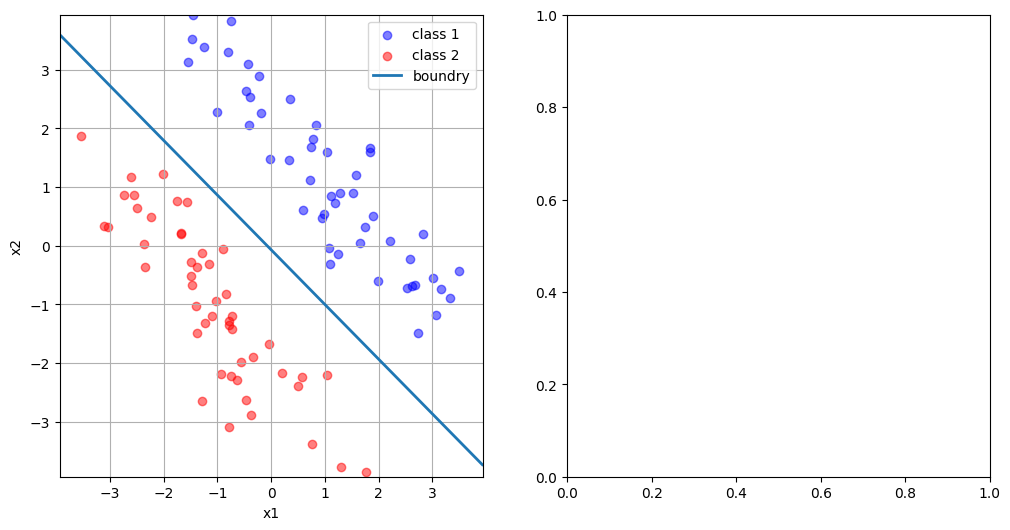

In [70]:
test_data = np.genfromtxt("dataset1_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
# print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()